## Loading Customer segmentation data for loan classification


In [2]:
#getting loan application data from ibm
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2018-09-28 08:00:48--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: 'Cust_Segmentation.csv'

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.002s  

2018-09-28 08:00:49 (15.2 MB/s) - 'Cust_Segmentation.csv' saved [34276/34276]



### Loading data from a csv file into a dataframe in pandas


In [3]:
# importing data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing

In [4]:
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [5]:
# getting statistical information from the dataframe
cust_df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [6]:
# As defaulted count and number of customers are different, data has to be cleaned for which defaulted is nan
cust_df = cust_df.dropna(how='any')
cust_df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,430.461429,34.860000,1.722857,8.388571,45.601429,1.553566,3.058196,0.261429,10.260571
std,243.323524,7.997342,0.928206,6.658039,36.814226,2.117196,3.287550,0.439727,6.827234
min,1.000000,20.000000,1.000000,0.000000,14.000000,0.012000,0.046000,0.000000,0.400000
25%,222.750000,29.000000,1.000000,3.000000,24.000000,0.368750,1.044000,0.000000,5.000000
50%,433.500000,34.000000,1.000000,7.000000,34.000000,0.855000,1.987500,0.000000,8.600000
75%,642.250000,40.000000,2.000000,12.000000,55.000000,1.901750,3.923250,1.000000,14.125000
max,850.000000,56.000000,5.000000,31.000000,446.000000,20.561000,27.034000,1.000000,41.300000


In [7]:
# counting the frequency of defaulters and non defaulters
cust_df['Defaulted'].value_counts()


0.0    517
1.0    183
Name: Defaulted, dtype: int64

### Feature set for the dataset


In [8]:
cust_df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [9]:
# converting the values in dataframe into numpy arrays for scikit learn computations
X = cust_df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'DebtIncomeRatio']].values
X[0:5]

array([[  4.10000000e+01,   2.00000000e+00,   6.00000000e+00,
          1.90000000e+01,   1.24000000e-01,   1.07300000e+00,
          6.30000000e+00],
       [  4.70000000e+01,   1.00000000e+00,   2.60000000e+01,
          1.00000000e+02,   4.58200000e+00,   8.21800000e+00,
          1.28000000e+01],
       [  3.30000000e+01,   2.00000000e+00,   1.00000000e+01,
          5.70000000e+01,   6.11100000e+00,   5.80200000e+00,
          2.09000000e+01],
       [  2.90000000e+01,   2.00000000e+00,   4.00000000e+00,
          1.90000000e+01,   6.81000000e-01,   5.16000000e-01,
          6.30000000e+00],
       [  4.70000000e+01,   1.00000000e+00,   3.10000000e+01,
          2.53000000e+02,   9.30800000e+00,   8.90800000e+00,
          7.20000000e+00]])

Considering the labels for X as Y

In [10]:
y = cust_df['Defaulted'].values

### Normalize Data
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.76830405,  0.29879269, -0.35900652, -0.72310225, -0.67569934,
        -0.60428433, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891,  1.47870741,  1.43142147,
         1.5706204 ,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057,  0.30984549,  2.15411948,
         0.83520125,  1.55949495],
       [-0.73326739,  0.29879269, -0.65961006, -0.72310225, -0.41242741,
        -0.77383254, -0.58052847],
       [ 1.51908977, -0.77932527,  3.39853777,  5.6376812 ,  3.66521532,
         1.78065319, -0.44860921]])

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (560, 7) (560,)
Test set: (140, 7) (140,)


# Classification 
## K nearest neighbor (K-NN)


## Training

Lets start the algorithm with k=4 for now:

In [13]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [14]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([ 0.,  1.,  0.,  0.,  0.])

### Accuracy evaluation
In multilabel classification, __accuracy classification score__ function computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how match the actual labels and predicted labels are in the test set.

In [15]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.819642857143
Test set Accuracy:  0.764285714286


In [16]:
#finding accuracy for k till 10 
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([ 0.74285714,  0.77857143,  0.75      ,  0.76428571,  0.79285714,
        0.79285714,  0.78571429,  0.80714286,  0.8       ,  0.8       ,
        0.79285714,  0.77857143,  0.78571429,  0.77857143])

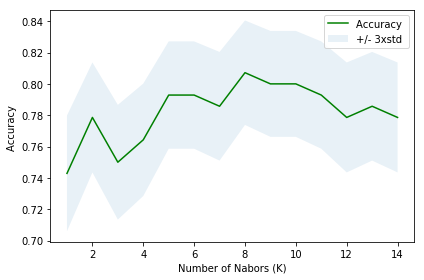

In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

# By seeing the graph the best value for k = 8

# Decision Trees

## Modeling
We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>defaulter_tree</b>.<br>
Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.

In [18]:
from sklearn.tree import DecisionTreeClassifier
defaulter_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

In [19]:
# setting up data for decision tree
X_dec = cust_df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'DebtIncomeRatio']].values
y_dec = cust_df[['Defaulted']].values
X_dec = preprocessing.StandardScaler().fit(X_dec).transform(X_dec.astype(float))
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X_dec, y_dec, test_size=0.3, random_state=3)

In [20]:
defaulter_tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
predTree = defaulter_tree.predict(X_testset)

In [22]:
print (predTree [0:5])
print (y_testset [0:5])
print(X_dec.shape)
print(y_dec.shape)

[ 0.  0.  0.  0.  0.]
[[ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]]
(700, 7)
(700, 1)


## Evaluation
Next, let's import __metrics__ from sklearn and check the accuracy of our model.

In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8


## Visualization
Lets visualize the tree

In [24]:
from sklearn.externals.six import StringIO
!conda install -c conda-forge pydotplus --yes
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

Solving environment: done

## Package Plan ##

  environment location: /opt/ibm/conda/miniconda3

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |       h470a237_0         3.5 MB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    pydotplus-2.0.2            |             py_1          22 KB  conda-forge
    conda-4.5.11               |           py35_0         636 KB  conda-forge
    ca-certificates-2018.8.24  |       ha4d7672_0         136 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-py_1            conda-forge

The following packages will be UPDATED:

    ca-certificates: 2017.08.26-h1d4fec5_0       

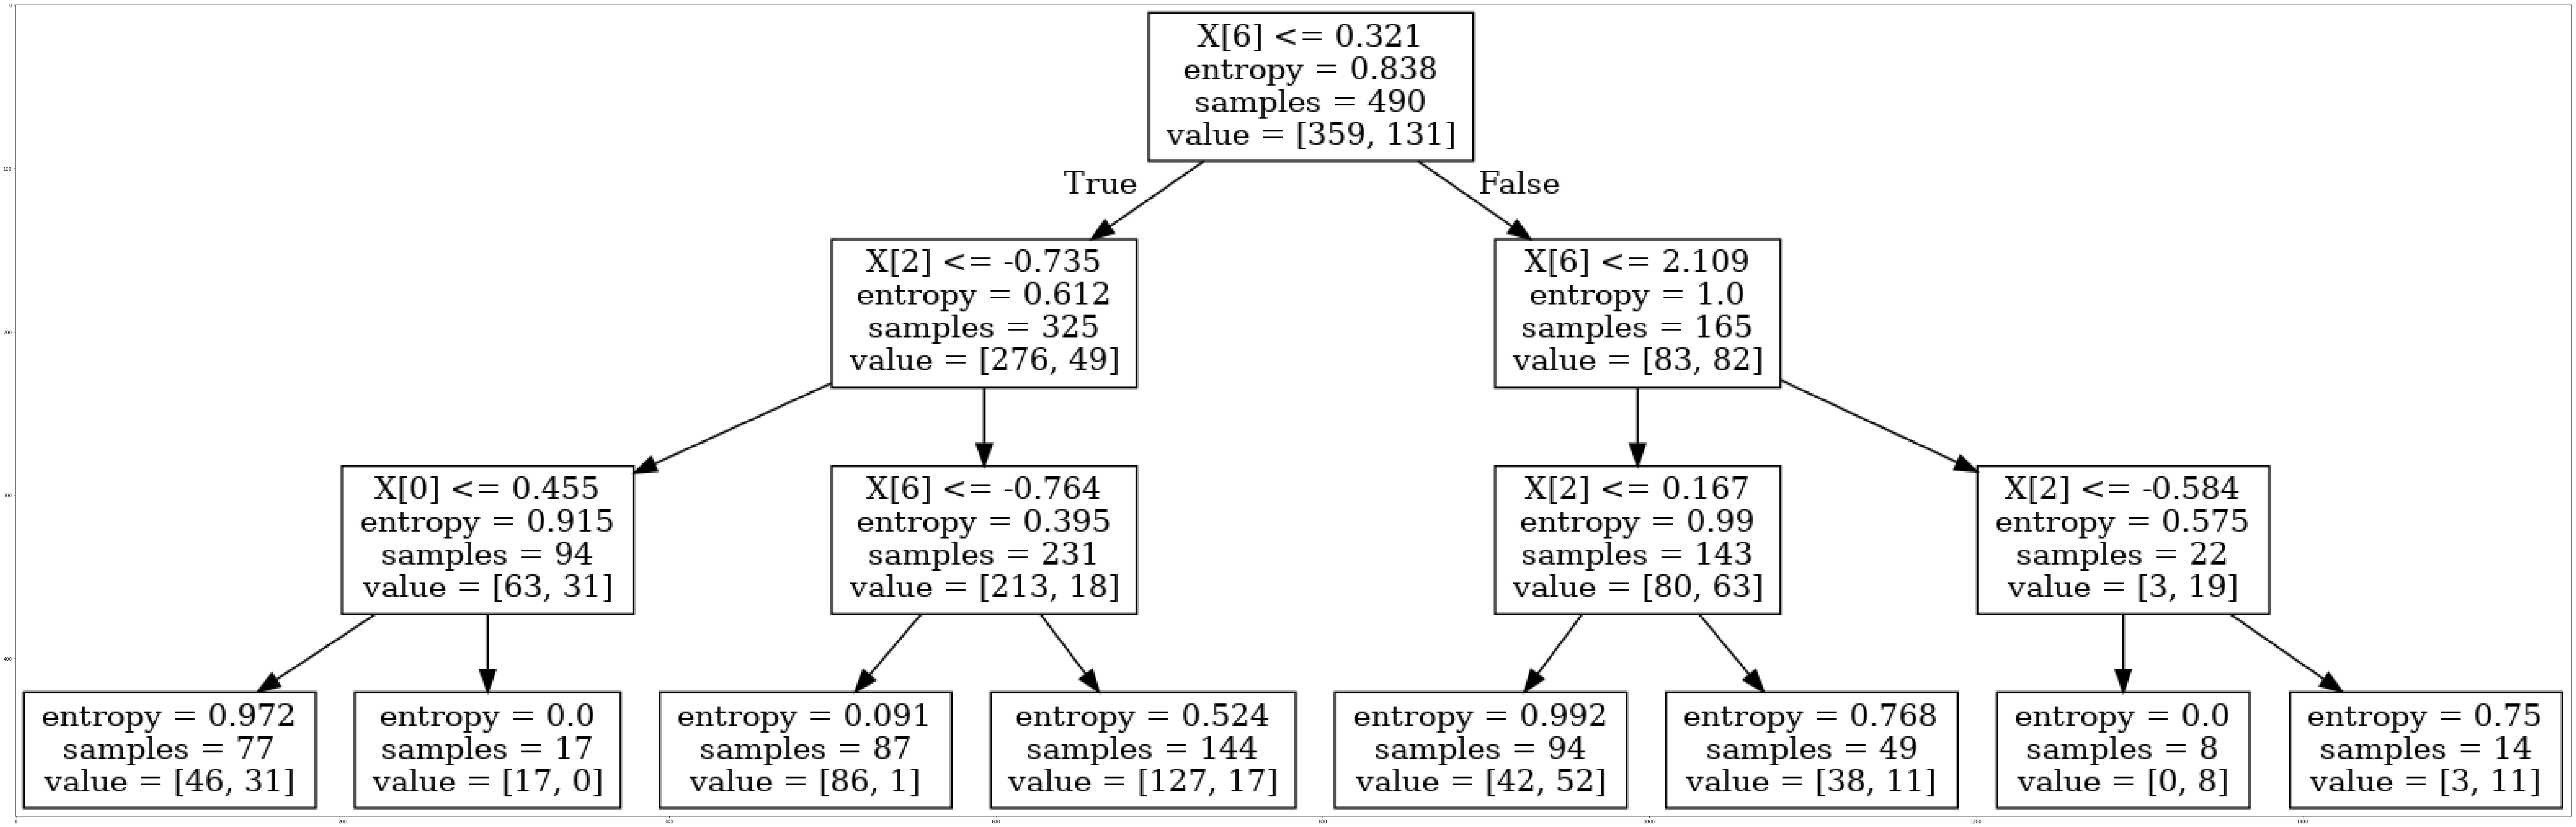

In [25]:
dot_data = StringIO()
filename = "defaulter_tree.png"
featureNames = cust_df.columns[1:7].append(cust_df.columns[9:]) 
targetNames = cust_df["Defaulted"].unique().tolist()
out=tree.export_graphviz(defaulter_tree,out_file=dot_data)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Classification using SVM

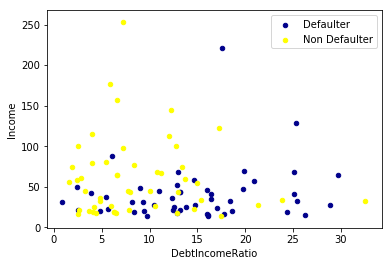

In [33]:
ax = cust_df[cust_df['Defaulted'] == 1][0:50].plot(kind='scatter', x='DebtIncomeRatio', y='Income', color='DarkBlue', label='Defaulter');
cust_df[cust_df['Defaulted'] == 0][0:50].plot(kind='scatter', x='DebtIncomeRatio', y='Income', color='Yellow', label='Non Defaulter', ax=ax);
plt.show()

In [65]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset) 

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
yhat = clf.predict(X_test)
yhat [0:5]

array([ 0.,  0.,  0.,  0.,  0.])

# Evaluation

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [68]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

        0.0       0.81      0.97      0.88       105
        1.0       0.79      0.31      0.45        35

avg / total       0.80      0.81      0.77       140

Confusion matrix, without normalization
[[ 11  24]
 [  3 102]]


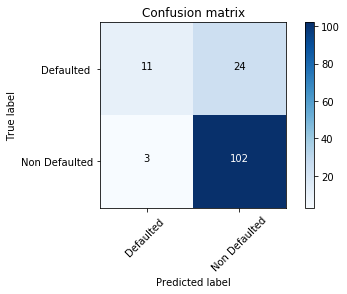

In [69]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Defaulted ','Non Defaulted'],normalize= False,  title='Confusion matrix')

In [70]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.77458256029684602

In [71]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.80714285714285716